# STEP1: IMPORTING THE LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# STEP2: LOADING THE DATA

In [12]:

df = pd.read_csv("gym_members_exercise_tracking_synthetic_data.csv")
print(df.head())
print("Shape:", df.shape)
print(df.info())


    Age  Gender  Weight (kg)  Height (m) Max_BPM  Avg_BPM  Resting_BPM  \
0  34.0  Female         86.7        1.86     174    152.0         74.0   
1  26.0  Female         84.7        1.83     166    156.0         73.0   
2  22.0    Male         64.8        1.85     187    166.0         64.0   
3  54.0  Female         75.3        1.82     187    169.0         58.0   
4  34.0  Female         52.8        1.74     177    169.0         66.0   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.12            712.0     Strength            12.8   
1                      1.00            833.0     Strength            27.9   
2                      1.24           1678.0       Cardio            28.7   
3                      1.45            628.0       Cardio            31.8   
4                      1.60           1286.0     Strength            26.4   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0              

# STEP 3: CHECK FOR MISSING VAlUES

In [3]:
# ---------------------------------------
# 2. CHECK FOR MISSING VALUES
# ---------------------------------------
print("\nMissing Values:")
print(df.isnull().sum())

# Simple missing value handling
numeric_cols = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(include='object').columns

# Fill numeric with median
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

# Fill categorical with mode
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

print("\nMissing Values After Cleaning:")
print(df.isnull().sum())


Missing Values:
Age                              10
Gender                           71
Weight (kg)                      22
Height (m)                       26
Max_BPM                          21
Avg_BPM                          30
Resting_BPM                      19
Session_Duration (hours)         23
Calories_Burned                  23
Workout_Type                     61
Fat_Percentage                   16
Water_Intake (liters)            24
Workout_Frequency (days/week)    58
Experience_Level                 57
BMI                              30
dtype: int64

Missing Values After Cleaning:
Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake 

# STEP 4: CREATE NEW INSIGHT COLOUMN

In [5]:
# ---------------------------------------
# 3. CREATE NEW INSIGHT COLUMN
# Workout Intensity = Avg BPM / Max BPM
# ---------------------------------------
# Convert to numeric (fix string issues)
df["Avg_BPM"] = pd.to_numeric(df["Avg_BPM"], errors="coerce")
df["Max_BPM"] = pd.to_numeric(df["Max_BPM"], errors="coerce")

# Fill missing values after conversion
df["Avg_BPM"] = df["Avg_BPM"].fillna(df["Avg_BPM"].median())
df["Max_BPM"] = df["Max_BPM"].fillna(df["Max_BPM"].median())

# Create new insight column
df["Workout_Intensity"] = df["Avg_BPM"] / df["Max_BPM"]

print(df["Workout_Intensity"].head())


0    0.873563
1    0.939759
2    0.887701
3    0.903743
4    0.954802
Name: Workout_Intensity, dtype: float64


# STEP 5: SIMPLE VISULAISATION USING MATPLOTLIB

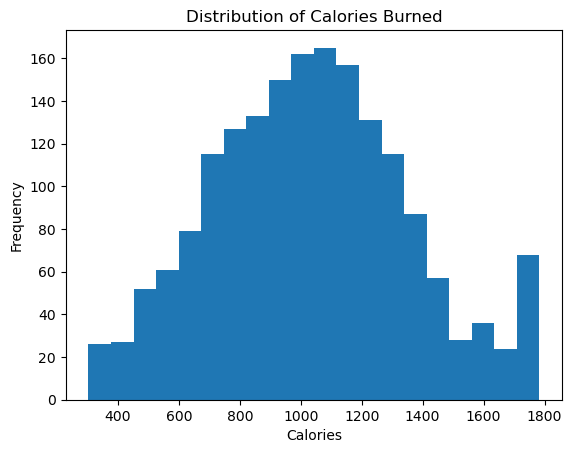

In [6]:
# ---------------------------------------
# 4. SIMPLE VISUALIZATIONS USING MATPLOTLIB
# ---------------------------------------

# 4.1 Histogram - Calories Burned
plt.hist(df["Calories_Burned"], bins=20)
plt.title("Distribution of Calories Burned")
plt.xlabel("Calories")
plt.ylabel("Frequency")
plt.show()


# 5.2 Bar Chart - Workout Type Count


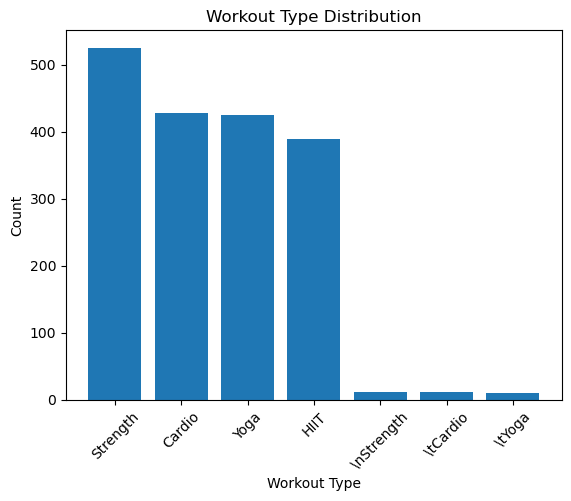

In [7]:
# 4.2 Bar Chart - Workout Type Count
workout_counts = df["Workout_Type"].value_counts()

plt.bar(workout_counts.index, workout_counts.values)
plt.title("Workout Type Distribution")
plt.xlabel("Workout Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# 5.3 Scatter Plot - Session Duration vs Calories Burned


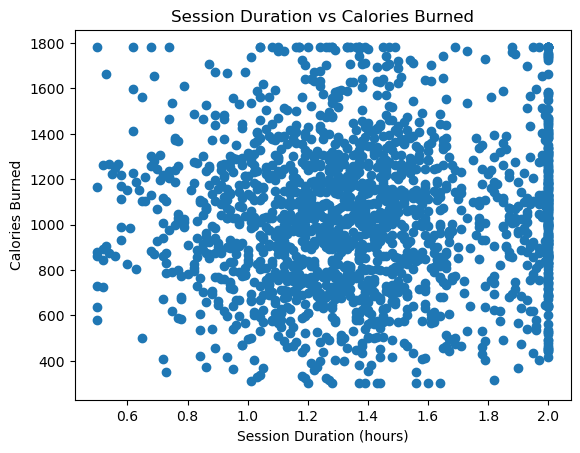

In [8]:
# 4.3 Scatter Plot - Session Duration vs Calories Burned
plt.scatter(df["Session_Duration (hours)"], df["Calories_Burned"])
plt.title("Session Duration vs Calories Burned")
plt.xlabel("Session Duration (hours)")
plt.ylabel("Calories Burned")
plt.show()


# RESULT(SUMMARY INSIGHTS)

In [9]:
# ---------------------------------------
# 5. SUMMARY INSIGHTS
# ---------------------------------------

print("\nCorrelation between duration & calories:")
print(df["Session_Duration (hours)"].corr(df["Calories_Burned"]))

print("\nAverage Calories by Workout Type:")
print(df.groupby("Workout_Type")["Calories_Burned"].mean())

print("\nAverage BMI by Gender:")
print(df.groupby("Gender")["BMI"].mean())


Correlation between duration & calories:
0.028232748613952467

Average Calories by Workout Type:
Workout_Type
Cardio        1045.221963
HIIT          1005.257069
Strength      1018.125714
Yoga          1065.821176
\nStrength     912.916667
\tCardio      1143.454545
\tYoga        1115.000000
Name: Calories_Burned, dtype: float64

Average BMI by Gender:
Gender
Female    19.689576
Male      20.208506
Name: BMI, dtype: float64
